<a href="https://colab.research.google.com/github/hc2twv/UPSE_OP/blob/main/ListaVecinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Celda A tiene como vecinas a: ['B', 'C']
Celda B tiene como vecinas a: ['A', 'C', 'D']
Celda C tiene como vecinas a: ['A', 'B', 'D']
Celda D tiene como vecinas a: ['B', 'C', 'E']
Celda E tiene como vecinas a: ['D', 'F']
Celda F tiene como vecinas a: ['E']


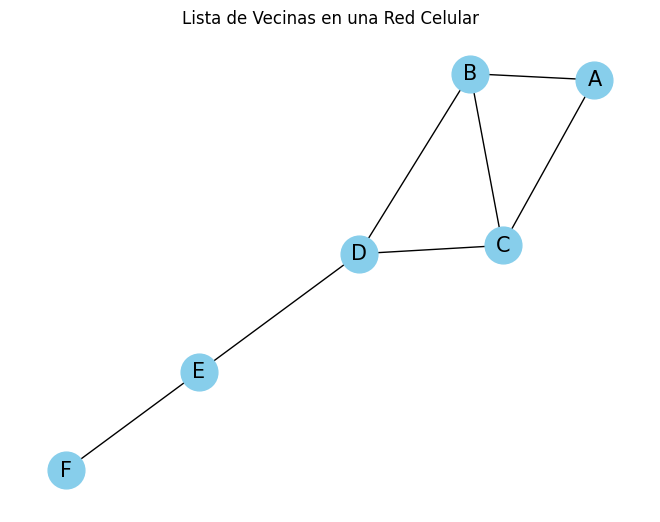

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo (cada nodo representa una celda)
cells = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(cells)

# Agregar aristas al grafo (cada arista representa una conexión entre celdas vecinas)
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F')]
G.add_edges_from(edges)

# Función para obtener la lista de vecinos de una celda
def get_neighbor_list(cell):
    return list(G.neighbors(cell))

# Obtener y mostrar la lista de vecinos para cada celda
for cell in cells:
    neighbors = get_neighbor_list(cell)
    print(f'Celda {cell} tiene como vecinas a: {neighbors}')

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_color='black')
plt.title('Lista de Vecinas en una Red Celular')
plt.show()


In [ ]:
#Definición del Problema
#Hay varias estaciones base (A, B, C) con diferentes intensidades de señal.
#El dispositivo móvil necesita seleccionar la estación base con la mejor señal.
#Si el dispositivo móvil se mueve, las intensidades de las señales cambian y el dispositivo debe seleccionar una nueva estación base si es necesario.

import random

# Simulación de intensidades de señal de las estaciones base (valores arbitrarios)
stations = {
    'A': -80,  # Intensidad de la señal en dBm
    'B': -75,
    'C': -90
}

# Función para simular el cambio en la intensidad de la señal
def update_signals(stations):
    for station in stations:
        # Simular un cambio en la intensidad de la señal
        stations[station] += random.randint(-5, 5)

# Función para seleccionar la mejor estación base según la intensidad de la señal
def select_best_station(stations):
    # Encontrar la estación con la mejor señal (mayor valor en dBm, es decir, el menos negativo)
    best_station = max(stations, key=stations.get)
    return best_station, stations[best_station]

# Inicialmente, seleccionar la mejor estación base
best_station, best_signal = select_best_station(stations)
print(f"Inicialmente conectado a la estación {best_station} con señal {best_signal} dBm")

# Simular el movimiento del dispositivo y el handover
for step in range(10):
    # Actualizar las intensidades de la señal
    update_signals(stations)

    # Seleccionar la mejor estación base
    new_station, new_signal = select_best_station(stations)

    if new_station != best_station:
        print(f"Handover a la estación {new_station} con señal {new_signal} dBm")
        best_station = new_station
        best_signal = new_signal
    else:
        print(f"Continúa conectado a la estación {best_station} con señal {best_signal} dBm")


Inicialmente conectado a la estación B con señal -75 dBm
Continúa conectado a la estación B con señal -75 dBm
Handover a la estación A con señal -76 dBm
Handover a la estación B con señal -76 dBm
Continúa conectado a la estación B con señal -76 dBm
Handover a la estación A con señal -72 dBm
Continúa conectado a la estación A con señal -72 dBm
Handover a la estación B con señal -65 dBm
Continúa conectado a la estación B con señal -65 dBm
Continúa conectado a la estación B con señal -65 dBm
Continúa conectado a la estación B con señal -65 dBm


Estación Base A (Intensidad de señal: -70 dBm) tiene vecinas:
  Vecina B con intensidad de señal -65 dBm y probabilidad de handover 0.9
  Vecina C con intensidad de señal -80 dBm y probabilidad de handover 0.7
Estación Base B (Intensidad de señal: -65 dBm) tiene vecinas:
  Vecina A con intensidad de señal -70 dBm y probabilidad de handover 0.9
  Vecina C con intensidad de señal -80 dBm y probabilidad de handover 0.8
  Vecina D con intensidad de señal -60 dBm y probabilidad de handover 0.95
Estación Base C (Intensidad de señal: -80 dBm) tiene vecinas:
  Vecina A con intensidad de señal -70 dBm y probabilidad de handover 0.7
  Vecina B con intensidad de señal -65 dBm y probabilidad de handover 0.8
  Vecina D con intensidad de señal -60 dBm y probabilidad de handover 0.85
Estación Base D (Intensidad de señal: -60 dBm) tiene vecinas:
  Vecina B con intensidad de señal -65 dBm y probabilidad de handover 0.95
  Vecina C con intensidad de señal -80 dBm y probabilidad de handover 0.85
  Vecina

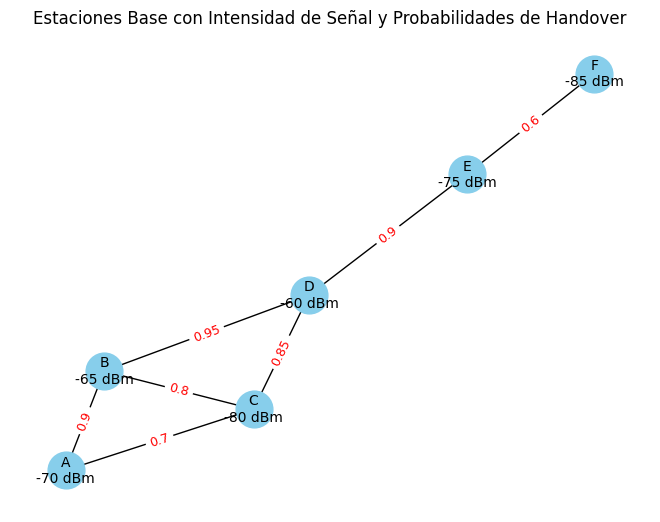

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo (cada nodo representa una estación base)
stations = ['A', 'B', 'C', 'D', 'E', 'F']
signal_strengths = {'A': -70, 'B': -65, 'C': -80, 'D': -60, 'E': -75, 'F': -85}

# Agregar nodos con intensidad de señal como atributo
for station in stations:
    G.add_node(station, signal_strength=signal_strengths[station])

# Agregar aristas al grafo (cada arista representa una conexión entre estaciones base)
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('E', 'F')]
handover_probabilities = {('A', 'B'): 0.9, ('A', 'C'): 0.7, ('B', 'C'): 0.8,
                          ('B', 'D'): 0.95, ('C', 'D'): 0.85, ('D', 'E'): 0.9, ('E', 'F'): 0.6}

# Agregar aristas con probabilidad de handover como atributo
for edge in edges:
    G.add_edge(edge[0], edge[1], handover_prob=handover_probabilities[edge])

# Función para obtener la lista de vecinos de una estación base con detalles
def get_neighbor_list(station):
    neighbors = list(G.neighbors(station))
    details = [(neighbor, G.nodes[neighbor]['signal_strength'], G[station][neighbor]['handover_prob']) for neighbor in neighbors]
    return details

# Obtener y mostrar la lista de vecinos para cada estación base
for station in stations:
    neighbors = get_neighbor_list(station)
    print(f'Estación Base {station} (Intensidad de señal: {G.nodes[station]["signal_strength"]} dBm) tiene vecinas:')
    for neighbor, signal, handover_prob in neighbors:
        print(f'  Vecina {neighbor} con intensidad de señal {signal} dBm y probabilidad de handover {handover_prob}')

# Dibujar el grafo con intensidad de señal y probabilidad de handover
pos = nx.spring_layout(G)
labels = {node: f'{node}\n{G.nodes[node]["signal_strength"]} dBm' for node in G.nodes}
edge_labels = {(u, v): f'{G[u][v]["handover_prob"]}' for u, v in G.edges}

nx.draw(G, pos, labels=labels, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color='red')
plt.title('Estaciones Base con Intensidad de Señal y Probabilidades de Handover')
plt.show()
